In [274]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error
import os

In [275]:
prost_cancer_df = pd.read_csv(os.path.join('data', 'prostate_cancer.csv'), sep="\t").drop('Unnamed: 0', axis=1)
resp_names      = ['lpsa']
var_names       = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

prost_cancer_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


array([[<Axes: xlabel='lpsa', ylabel='lpsa'>,
        <Axes: xlabel='lcavol', ylabel='lpsa'>,
        <Axes: xlabel='lweight', ylabel='lpsa'>,
        <Axes: xlabel='age', ylabel='lpsa'>,
        <Axes: xlabel='lbph', ylabel='lpsa'>,
        <Axes: xlabel='svi', ylabel='lpsa'>,
        <Axes: xlabel='lcp', ylabel='lpsa'>,
        <Axes: xlabel='gleason', ylabel='lpsa'>,
        <Axes: xlabel='pgg45', ylabel='lpsa'>],
       [<Axes: xlabel='lpsa', ylabel='lcavol'>,
        <Axes: xlabel='lcavol', ylabel='lcavol'>,
        <Axes: xlabel='lweight', ylabel='lcavol'>,
        <Axes: xlabel='age', ylabel='lcavol'>,
        <Axes: xlabel='lbph', ylabel='lcavol'>,
        <Axes: xlabel='svi', ylabel='lcavol'>,
        <Axes: xlabel='lcp', ylabel='lcavol'>,
        <Axes: xlabel='gleason', ylabel='lcavol'>,
        <Axes: xlabel='pgg45', ylabel='lcavol'>],
       [<Axes: xlabel='lpsa', ylabel='lweight'>,
        <Axes: xlabel='lcavol', ylabel='lweight'>,
        <Axes: xlabel='lweight', ylabel=

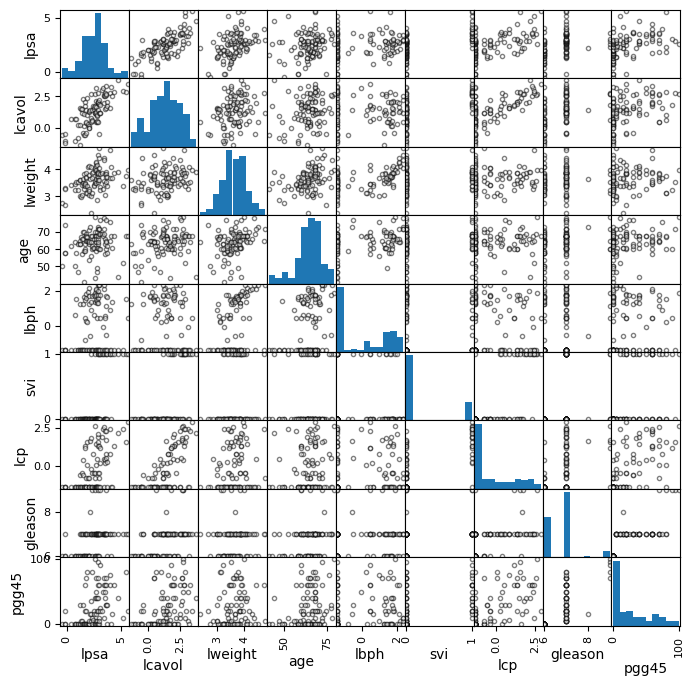

In [276]:
pd.plotting.scatter_matrix(prost_cancer_df[resp_names+var_names],
                            figsize    = (8, 8),
                            facecolors = "w",
                            edgecolors = "k")
#plt.savefig(os.path.join('figures', 'cancer_scatter_matrix.png'), dpi=300, transparent=True, bbox_inches = 'tight')



In [277]:
def residual_sum_of_squares(y, y_hat):
    return np.sum((y - y_hat)**2)

def ridge_reggression(X, y, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    return ridge

def lasso_regression(X, y, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    return lasso

def normalize_data(x):
    x = x - np.mean(x, axis=0)
    x = x / np.std(x, axis=0)
    return x

In [278]:
train_df = prost_cancer_df[prost_cancer_df.train=="T"]
test_df  = prost_cancer_df[prost_cancer_df.train=="F"]

y_train = train_df[resp_names].values
X_train = train_df[var_names].values
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

y_test = test_df[resp_names].values
X_test = test_df[var_names].values
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


In [279]:
alphas = np.arange(0, 1 + 0.1, 0.01)

rss_train = np.full_like(alphas, fill_value=np.nan)
rss_test  = np.full_like(alphas, fill_value=np.nan)
β_ridge   = np.full((len(alphas), X_train.shape[1]), fill_value=np.nan)

for i_α, α in enumerate(alphas):
    ridge_model     = ridge_reggression(X_train, y_train, α)
    β_ridge[i_α, :] = ridge_model.coef_.flatten()

    rss_train[i_α]   = residual_sum_of_squares(np.squeeze(ridge_model.predict(X_train)), np.squeeze(y_train))
    rss_test[i_α]    = residual_sum_of_squares(np.squeeze(ridge_model.predict(X_test)), np.squeeze(y_test))


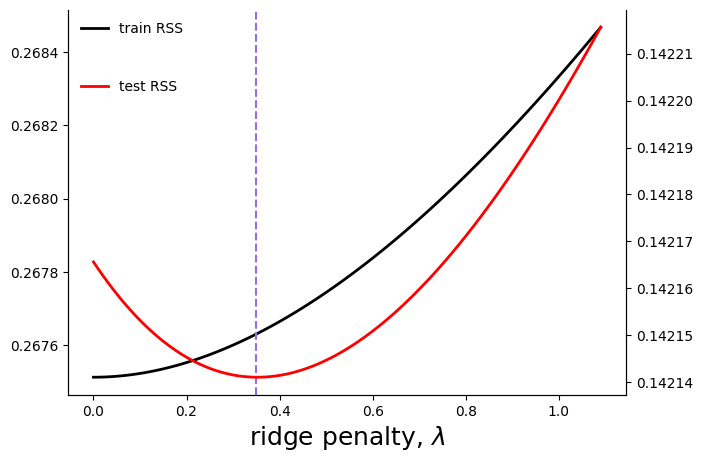

In [280]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

ax.plot(alphas, rss_train/len(rss_train), label="train RSS", color="k", lw=2)

ax_t = ax.twinx()
ax_t.plot(alphas, rss_test/len(rss_test), label="test RSS", color="red", lw=2)

ax.legend(loc="upper left", frameon=False)
ax_t.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.0, 0.85))

ax.spines["top"].set_visible(False)
ax_t.spines["top"].set_visible(False)

ax.set_xlabel(r"ridge penalty, $\lambda$", fontsize=18)

λ_hat  = np.argmin(rss_test)
ax.axvline(alphas[λ_hat], color="mediumpurple", linestyle="--")

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'ridge_rss.png'))

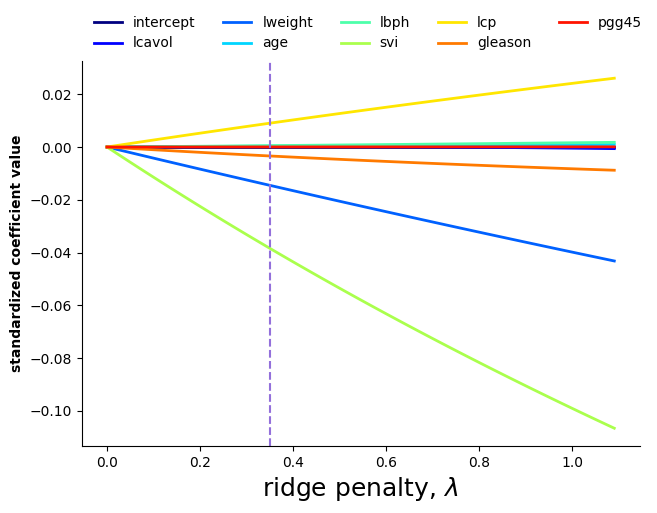

In [281]:
λ_hat  = np.argmin(rss_test)
labels = ["intercept"] + var_names
colors = plt.cm.jet(np.linspace(0, 1, len(labels)+1))

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

for i_β in range(β_ridge.shape[1]):

    coefs_norm = β_ridge - np.expand_dims(β_ridge[0, :], 0)
    c   = colors[i_β]

    β_i = coefs_norm[:, i_β]
    ax.plot(alphas, β_i, label=labels[i_β], color=c, lw=2)

ax.axvline(alphas[λ_hat], color="mediumpurple", linestyle="--")
ax.set_xlabel(r"ridge penalty, $\lambda$", fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel(r"standardized coefficient value", weight="bold")
ax.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.0, 1.15), ncol=5)

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'ridge_params.png'))

/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+01, tolerance: 9.628e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

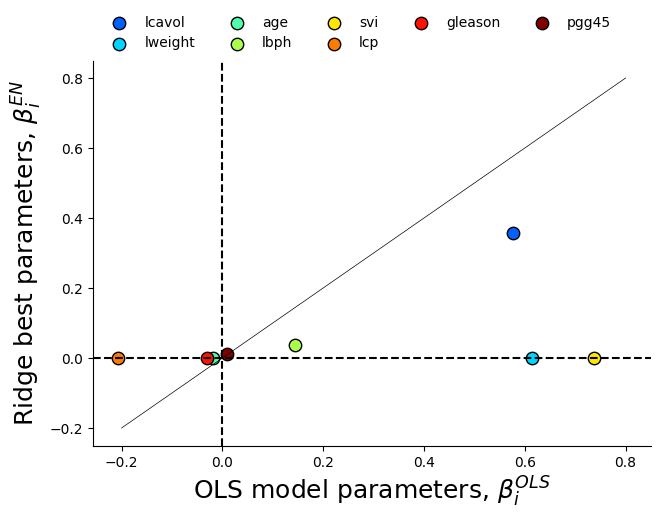

In [282]:

lasso = Lasso(alpha=alphas[λ_hat], fit_intercept=True).fit(X_train, y_train)
params = lasso.coef_

lasso = Lasso(alpha=0, fit_intercept=True).fit(X_train, y_train)
params_null = lasso.coef_

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

for ic, color in enumerate(colors[1:]):
    if ic>0:
        ax.scatter(params_null[ic], params[ic],  s=80, fc=color, ec="k", label=labels[ic])

ax.set_xlabel(r"OLS model parameters, $\beta^{OLS}_i$", fontsize=18)
ax.set_ylabel(r"Ridge best parameters, $\beta^{EN}_i$", fontsize=18)

ax.axhline(0, color="black", linestyle="--")
ax.axvline(0, color="black", linestyle="--")

ax.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.0, 1.15), ncol=5)
ax.plot([-0.2, 0.8], [-0.2, 0.8], color="k", linestyle="-", label="y=x", lw=0.5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'ridge_delta_params.png'))

In [283]:
alphas = np.arange(0, 0.5+ 0.1, 0.01)

rss_train = np.full_like(alphas, fill_value=np.nan)
rss_test  = np.full_like(alphas, fill_value=np.nan)
β_lasso   = np.full((len(alphas), X_train.shape[1]), fill_value=np.nan)

for i_α, α in enumerate(alphas):
    lasso_model     = lasso_regression(X_train, y_train, α)
    β_lasso[i_α, :] = lasso_model.coef_.flatten()

    rss_train[i_α]   = residual_sum_of_squares(lasso_model.predict(X_train), np.squeeze(y_train))
    rss_test[i_α]    = residual_sum_of_squares(lasso_model.predict(X_test), np.squeeze(y_test))


/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+01, tolerance: 9.628e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

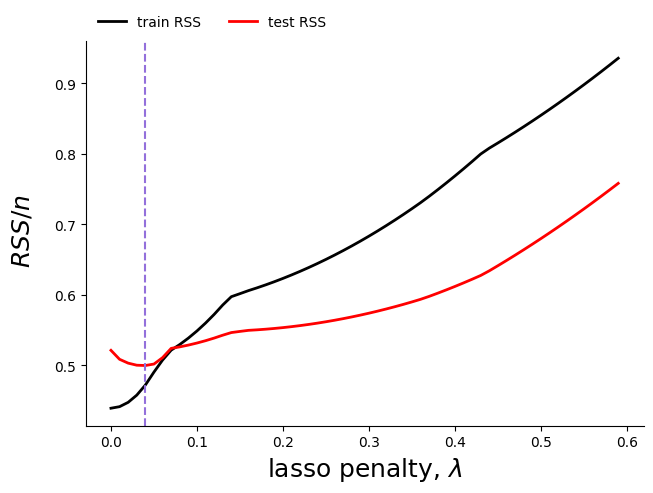

In [284]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

ax.plot(alphas, rss_train/len(X_train), label="train RSS", color="k", lw=2)

ax.plot(alphas, rss_test/len(X_test), label="test RSS", color="red", lw=2)


ax.legend(loc="upper left", frameon=False, bbox_to_anchor=(0, 1.1), ncol=2)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel(r"lasso penalty, $\lambda$", fontsize=18)

λ_hat  = np.argmin(rss_test)
ax.axvline(alphas[λ_hat], color="mediumpurple", linestyle="--")

fig.supylabel(r"$RSS/n$", fontsize=18)

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'lasso_rss.png'))

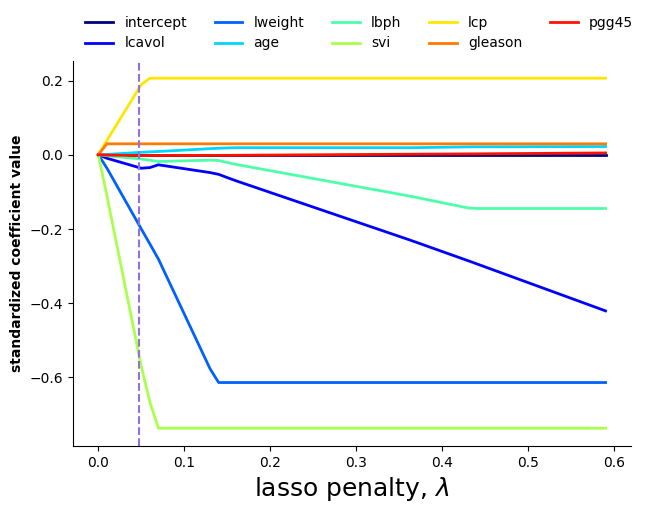

In [285]:
λ_hat  = np.argmin(rss_test)
labels = ["intercept"] + var_names
colors = plt.cm.jet(np.linspace(0, 1, len(labels)+1))

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

for i_β in range(β_lasso.shape[1]):

    coefs_norm = β_lasso - np.expand_dims(β_lasso[0, :], 0)
    c   = colors[i_β]

    β_i = coefs_norm[:, i_β]
    ax.plot(alphas, β_i, label=labels[i_β], color=c, lw=2)

ax.axvline(alphas[λ_hat]/np.sum(np.abs(coefs_norm[λ_hat, :])), color="mediumpurple", linestyle="--")

ax.set_xlabel(r"lasso penalty, $\lambda$", fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel(r"standardized coefficient value", weight="bold")
ax.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.0, 1.15), ncol=5)


fig.savefig(os.path.join('figures', 'shrinkage_methods', 'lasso_params.png'))

/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+01, tolerance: 9.628e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

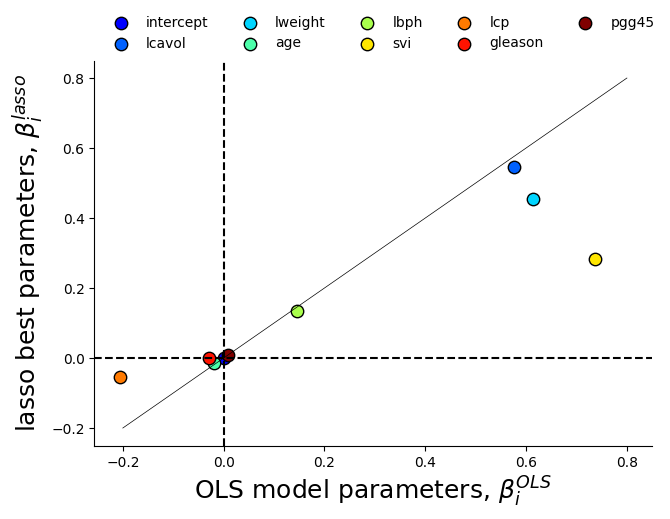

In [286]:

lasso = Lasso(alpha=alphas[λ_hat], fit_intercept=True).fit(X_train, y_train)
params = lasso.coef_

lasso = Lasso(alpha=0, fit_intercept=True).fit(X_train, y_train)
params_null = lasso.coef_

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

for ic, color in enumerate(colors[1:]):
    ax.scatter(params_null[ic], params[ic],  s=80, fc=color, ec="k", label=labels[ic])

ax.set_xlabel(r"OLS model parameters, $\beta^{OLS}_i$", fontsize=18)
ax.set_ylabel(r"lasso best parameters, $\beta^{lasso}_i$", fontsize=18)

ax.axhline(0, color="black", linestyle="--")
ax.axvline(0, color="black", linestyle="--")

ax.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.0, 1.15), ncol=5)
ax.plot([-0.2, 0.8], [-0.2, 0.8], color="k", linestyle="-", label="y=x", lw=0.5)

ax.spines["right"].set_visible( False )
ax.spines["top"].set_visible( False )

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'lasso_delta_params.png'))

In [287]:
from sklearn.linear_model import ElasticNet

ridge_range = np.linspace(0, 0.2, 300)
lasso_range = np.linspace(0, 0.2, 300)

rss_train = np.full((len(ridge_range), len(lasso_range)), fill_value=np.nan)
rss_test  = np.full((len(ridge_range), len(lasso_range)), fill_value=np.nan)

β_en = np.full((len(ridge_range), len(lasso_range), X_train.shape[1]), fill_value=np.nan)

for ia, a in enumerate(lasso_range):
    for ib, b in enumerate(ridge_range):

        α  = a + b
        l1 = np.nan_to_num(a / (a + b), 0)


        elasti_net_model = ElasticNet(alpha=α, l1_ratio=l1, fit_intercept=True).fit(X_train, y_train)
        β_en[ia, ib, :]  = lasso_model.coef_.flatten()

        rss_train[ia, ib]  = residual_sum_of_squares(elasti_net_model.predict(X_train), np.squeeze(y_train))
        rss_test[ia, ib]   = residual_sum_of_squares(elasti_net_model.predict(X_test), np.squeeze(y_test))



/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_55917/801758460.py:15: RuntimeWarning: invalid value encountered in scalar divide
  l1 = np.nan_to_num(a / (a + b), 0)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+01, tolera

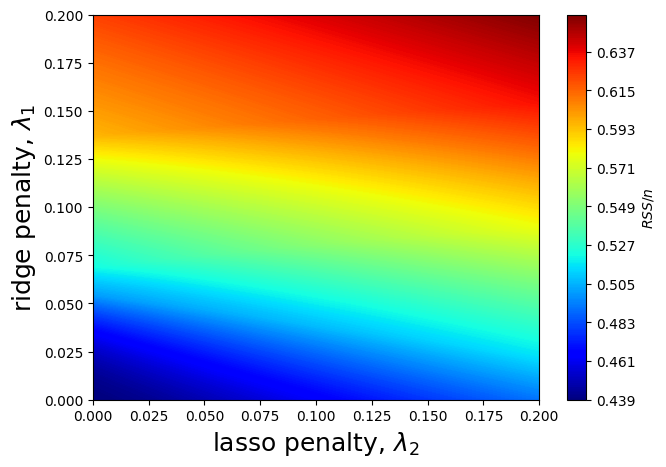

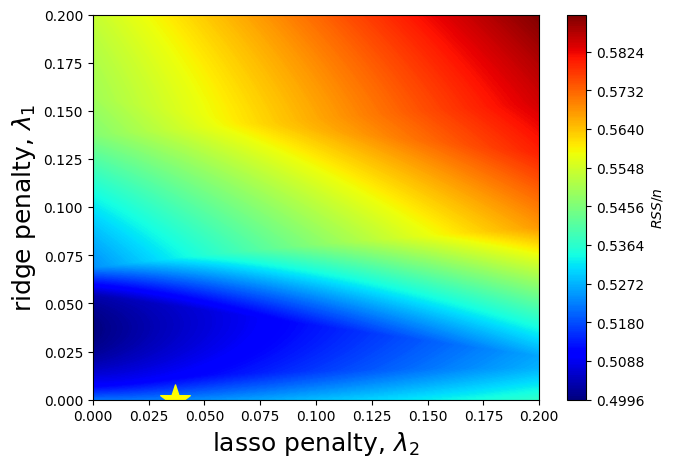

In [288]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

c = ax.contourf(lasso_range, ridge_range, rss_train/len(X_train), cmap="jet", levels=500)

ax.set_ylabel(r"ridge penalty, $\lambda_1$", fontsize=18)
ax.set_xlabel(r"lasso penalty, $\lambda_2$", fontsize=18)

fig.colorbar(c, ax=ax, label=r"$RSS/n$")

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'elastic_net_rss-train.png'))
####-####-####-####

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

c = ax.contourf(lasso_range, ridge_range, rss_test/len(X_test), cmap="jet", levels=500)

ax.set_ylabel(r"ridge penalty, $\lambda_1$", fontsize=18)
ax.set_xlabel(r"lasso penalty, $\lambda_2$", fontsize=18)

fig.colorbar(c, ax=ax, label=r"$RSS/n$")


lasso_star, ridge_star = np.where(rss_test==np.min(rss_test))

a = lasso_range[lasso_star][0]
b = ridge_range[ridge_star][0]

ax.scatter(a, b, color="yellow", s=500, marker="*")

fig.savefig(os.path.join('figures', 'shrinkage_methods', 'elastic_net_rss-test.png'))


/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+01, tolerance: 9.628e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

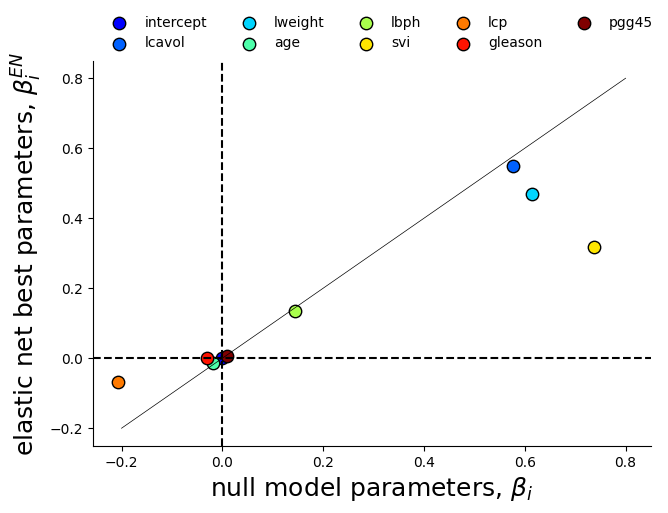

In [289]:
lasso_star, ridge_star = np.where(rss_test==np.min(rss_test))

α  = a + b
l1 = np.nan_to_num(a / (a + b), 0)

elasti_net_model = ElasticNet(alpha=α, l1_ratio=l1, fit_intercept=True).fit(X_train, y_train)
params           = elasti_net_model.coef_

elasti_net_model = ElasticNet(alpha=0, l1_ratio=0, fit_intercept=True).fit(X_train, y_train)
params_null = elasti_net_model.coef_

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5), sharex=True)

for ic, color in enumerate(colors[1:]):
    ax.scatter(params_null[ic], params[ic],  s=80, fc=color, ec="k", label=labels[ic])

ax.set_xlabel(r"null model parameters, $\beta_i$", fontsize=18)
ax.set_ylabel(r"elastic net best parameters, $\beta^{EN}_i$", fontsize=18)

ax.axhline(0, color="black", linestyle="--")
ax.axvline(0, color="black", linestyle="--")

ax.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.0, 1.15), ncol=5)
ax.plot([-0.2, 0.8], [-0.2, 0.8], color="k", linestyle="-", label="y=x", lw=0.5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


fig.savefig(os.path.join('figures', 'shrinkage_methods', 'en_delta_params.png'))

In [290]:
hearth_disease_df = pd.read_csv(os.path.join('data', 'hearth_disease.csv')).drop('row.names', axis=1)
hearth_disease_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


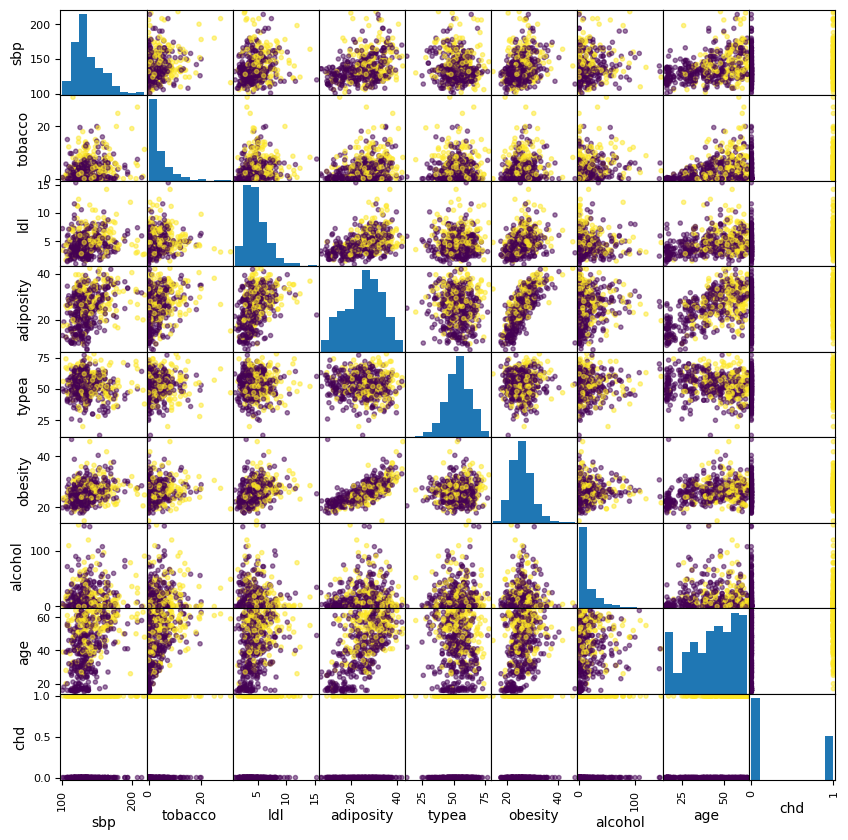

In [291]:
import seaborn as sns

pd.plotting.scatter_matrix(hearth_disease_df,
                            figsize    = (10, 10),
                            edgecolors = None,
                            c          = hearth_disease_df.chd.values)

#sns.pairplot(figsize=(12.2, 7.2), data=hearth_disease_df, hue='chd')
plt.savefig(os.path.join('figures', "shrinkage_methods", 'cancer_scatter_matrix.png'),
                                        dpi=300, transparent=True, bbox_inches = 'tight')



In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error
import os


In [6]:
from sklearn.model_selection import cross_validate


def bootstraping(n_data, f_train):
    n_test = int(n_data)*f_train

    idx_train = np.random.choice(range(n_data), size=int(n_data)*f_train, replace=True)
    idx_test  = np.setdiff1d(range(n_data), idx_train)
    return


AttributeError: 'function' object has no attribute 'Bootstrap'

In [14]:
n_data  = 100
f_train = 0.8

def bootstraping(n_data, f_train):
    n_train = int(int(n_data)*f_train)
    n_test  = int(n_data) - n_train

    idx_train = np.random.choice(range(n_data), size=n_train, replace=True)
    test_set  = np.setdiff1d(range(n_data), idx_train)
    idx_test  = np.random.choice(range(n_data), size=n_test, replace=True)

